In [1]:
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

In [4]:
series.shape

(10000, 51, 1)

In [5]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]

In [6]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [7]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[50, 1])
])

In [8]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam())

In [9]:
model.fit(X_train, y_train)

219/219 [==============================] - 2s 6ms/step - loss: 0.2716


# Practice

In [230]:
a = pd.read_csv('../../store-sales-time-series-forecasting/train.csv', usecols = ['store_nbr', 'family', 'sales']).groupby(['store_nbr', 'family']).mean()

In [234]:
a

sales
store_nbr family                                 
1         AUTOMOTIVE                     3.251188
          BABY CARE                      0.000000
          BEAUTY                         2.408551
          BEVERAGES                   1587.748812
          BOOKS                          0.125297
...                                           ...
54        POULTRY                       52.784924
          PREPARED FOODS                61.217340
          PRODUCE                      354.026315
          SCHOOL AND OFFICE SUPPLIES     0.607482
          SEAFOOD                        1.744656

[1782 rows x 1 columns]

In [232]:
a.loc[2]

,sales
family,
AUTOMOTIVE,5.403800
BABY CARE,0.049881
BEAUTY,4.712589
BEVERAGES,2466.693587
BOOKS,0.141924
BREAD/BAKERY,548.855574
CELEBRATION,7.947743
CLEANING,965.480404
DAIRY,853.242280


In [10]:
train = pd.read_csv('../../store-sales-time-series-forecasting/train.csv', usecols=['date','sales'], index_col='date')

In [11]:
train

,sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [12]:
sales_data = []
for day in sorted(list(set(train.index))):
    sales_data += [train.loc[day].values.squeeze().tolist()]

In [13]:
sales_data = np.array(sales_data)

In [14]:
sales_data.shape

(1684, 1782)

In [227]:
sales_data[1]

array([ 2.   ,  0.   ,  2.   , ...,  0.   ,  0.   , 29.214])

In [110]:
train = sales_data[:1600]

In [111]:
valid = sales_data[1600:]

In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
valid = scaler.transform(valid)

In [203]:
time_steps = 7
ts_train_len = 1600
ts_valid_len = len(valid)
for_periods = 1

In [204]:
len(valid)

84

In [205]:
X_train = []
y_train = []
for i in range(time_steps, ts_train_len-1):
    X_train.append(train[i-time_steps:i])
    y_train.append(train[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [206]:
X_valid = []
y_valid = []
for i in range(time_steps, ts_valid_len-1):
    X_valid.append(valid[i-time_steps:i])
    y_valid.append(valid[i])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [207]:
X_train.shape, y_train.shape

((1592, 7, 1782), (1592, 1782))

In [208]:
X_valid.shape, y_valid.shape

((76, 7, 1782), (76, 1782))

In [209]:
y_valid

array([[0.16666667, 0.        , 0.91666667, ..., 0.34572196, 0.00613497,
        0.27982863],
       [0.33333333, 0.        , 0.08333333, ..., 0.37845744, 0.00920245,
        0.53928162],
       [1.05555556, 0.        , 0.08333333, ..., 0.35775819, 0.01840491,
        0.1826666 ],
       ...,
       [0.33333333, 0.        , 0.25      , ..., 0.34958042, 0.42331288,
        0.27996149],
       [0.05555556, 0.        , 0.08333333, ..., 0.41715414, 0.61349693,
        0.33212109],
       [0.05555556, 0.        , 0.5       , ..., 0.33213199, 0.55828221,
        0.28230293]])

In [210]:
X_train.shape

(1592, 7, 1782)

In [211]:
y_train.shape

(1592, 1782)

In [212]:
X_valid.shape

(76, 7, 1782)

In [213]:
y_valid.shape

(76, 1782)

In [214]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(100, input_shape=[None, 1782], return_sequences=True),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.SimpleRNN(100),
    keras.layers.Dense(1782)
])

In [215]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam())

In [216]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
50/50 [==============================] - 2s 17ms/step - loss: 0.0259 - val_loss: 0.0228
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0111 - val_loss: 0.0207
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0102 - val_loss: 0.0196
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0095 - val_loss: 0.0186
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0089 - val_loss: 0.0187
Epoch 6/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0085 - val_loss: 0.0181
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0083 - val_loss: 0.0175
Epoch 8/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0079 - val_loss: 0.0170
Epoch 9/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0077 - val_loss: 0.0163
Epoch 10/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0074 - val_loss: 0.0158
Epoch 11/

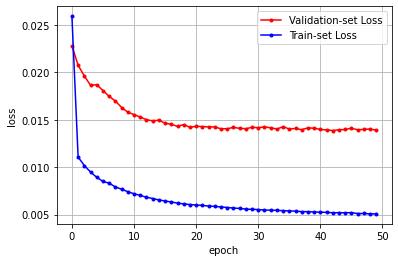

In [217]:
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [218]:
sales_data.shape

(1684, 1782)

In [195]:
len(sales_data[:, 1])

1684

In [196]:
scaler.transform(sales_data)[1620:,3]

array([0.51059196, 0.53593348, 0.42308454, 0.50128687, 0.54207088,
       0.1989705 , 0.49356563, 0.58938824, 0.51138388, 0.36111661,
       0.47396555, 0.52940012, 0.21183924, 0.4438725 , 0.41595724,
       0.43615126, 0.42130271, 0.49415957, 0.51395763, 0.22470798,
       0.50009899, 0.45218769, 0.53276579, 0.45218769, 0.50960206,
       0.46545239, 0.23381509, 0.46287864, 0.46960998, 0.48703227,
       0.41872896, 0.50069293, 0.43219165, 0.21362107, 0.4713918 ,
       0.51257177, 0.46901604, 0.39714908, 0.56602653, 0.44704019,
       0.20273213, 0.42724213, 0.4826767 , 0.4438725 , 0.39635716,
       0.46683825, 0.42783607, 0.23995248, 0.47792516, 0.52009503,
       0.52365868, 0.40328648, 0.4907939 , 0.41437339, 0.19164522,
       0.41298753, 0.47871709, 0.45753316, 0.47059988, 0.19916848,
       0.32844981, 0.15897842, 0.4357553 , 0.38447832])

In [197]:
scaler.transform(sales_data)[1608:,3].shape

(76,)

In [198]:
X_valid.shape

(80, 3, 1782)

In [199]:
def plot_predict(a = 0):
    plt.plot(scaler.transform(sales_data)[-77:,a])
    plt.plot(model.predict(X_valid)[:, a])
    plt.legend(['True', 'Predict'])
    plt.show()

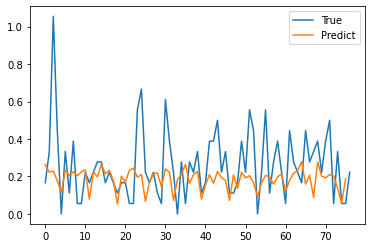

In [219]:
plot_predict()

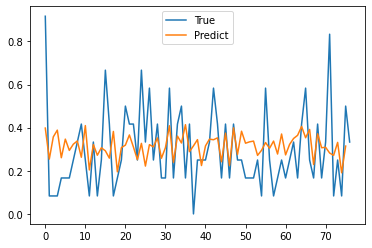

In [220]:
plot_predict(2)

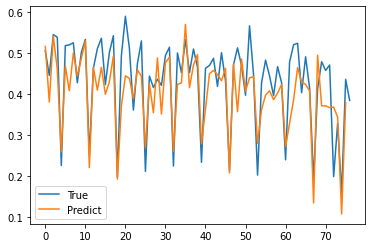

In [221]:
plot_predict(3)

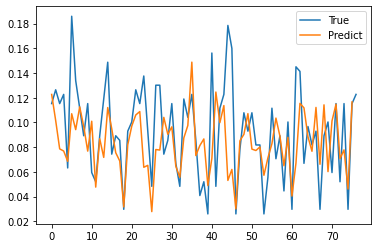

In [222]:
plot_predict(16)

In [258]:
sales_data[:, 3]

array([   0., 1091.,  919., ...,  803., 2201., 1942.])

In [259]:
model.predict(X_valid[:3])

array([[ 5.09844609e-02,  1.19060006e-08,  9.17587698e-01, ...,
         2.19719067e-01, -3.53962243e-01, -7.95165777e-01],
       [ 2.23871723e-01, -2.97572411e-10,  8.95112276e-01, ...,
         1.31580994e-01, -4.73981440e-01, -5.61966360e-01],
       [ 3.58194590e-01,  1.21075905e-08,  7.48227537e-01, ...,
         1.74972340e-01, -3.56857926e-02, -8.69415045e-01]], dtype=float32)

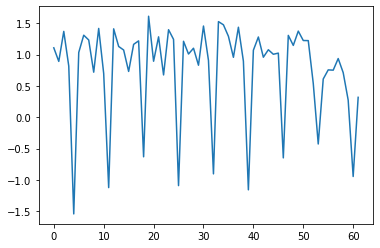

In [260]:
plt.plot(model.predict(X_valid)[:, 3])